In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# Завдання 1 
##  Згенерувати матрицю для визначення власних чисел у вигляді (3.11) в якості індивідуального варіанту завдання.


In [2]:
n = 112
m = 4
l = 2
k = 3
i = 2
j = 1

In [3]:
A = Matrix([[n, 7, 2, 4, m, -3],
     [5, -l, -2, -3, -3, 2],
     [2, -1, k, -1, 2, -2*j],
     [2*l, 5, -1, -i, 2, -2],
     [-2, -4, 3, 1, j, -2],
     [-1, -3*k, 8, 2, -2, m]])

In [4]:
A

Matrix([
[112,  7,  2,  4,  4, -3],
[  5, -2, -2, -3, -3,  2],
[  2, -1,  3, -1,  2, -2],
[  4,  5, -1, -2,  2, -2],
[ -2, -4,  3,  1,  1, -2],
[ -1, -9,  8,  2, -2,  4]])

# Завдання 2 
## За допомогою методів Крилова і Фаддєєва-Леверьє побудувати характеристичні рівняння матриці і порівняти їх.


### Метод Фаддєєва–Левер’є

In [5]:
def leverrier_method(A):
    n = A.shape[0]
    E = eye(n)
    Kn = eye(n)
    bn = -trace(Kn*A)
    coeffs = [1, bn]
    for k in range(1, n):
        Kn = A*Kn + bn*E
        bn = -1/(k+1)*trace(Kn*A)
        coeffs.append(bn)
    return Poly(coeffs, symbols('lambda')), Kn, coeffs,E

In [6]:
laverrier_poly, Kn, coefs, E = leverrier_method(A)
print('\nХарактеристичне рівняння за методом Фаддєєва-Леверьє:')
laverrier_poly.as_expr()


Характеристичне рівняння за методом Фаддєєва-Леверьє:


1.0*lambda**6 - 116.0*lambda**5 + 415.0*lambda**4 - 1529.0*lambda**3 - 9998.0*lambda**2 - 68609.0*lambda - 23912.0

### Перевірка за формулою A*K0 +b0*E = 0

In [7]:
A * Kn + coefs[6] * E


Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])

### Бачимо, що наші підрахунки вірні

### Метод Крилова

In [8]:
x0 = [1, 0, 0, 0, 0, 0]
x0 = np.array(x0, dtype = float)
n = A.shape[0]
x = []
for i in range(n + 1):
    x.append(np.linalg.matrix_power(A, i).dot(x0))
x

[array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object),
 array([112.000000000000, 5.00000000000000, 2.00000000000000,
        4.00000000000000, -2.00000000000000, -1.00000000000000],
       dtype=object),
 array([12594.0000000000, 538.000000000000, 219.000000000000,
        461.000000000000, -234.000000000000, -133.000000000000],
       dtype=object),
 array([1416039.00000000, 60509.0000000000, 24644.0000000000,
        51723.0000000000, -26190.0000000000, -14826.0000000000],
       dtype=object),
 array([159215829.000000, 6803638.00000000, 2771050.00000000,
        5815883.00000000, -2944997.00000000, -1666946.00000000],
       dtype=object),
 array([17901824796.0000, 764983219.000000, 311569185.000000,
        653922588.000000, -331128282.000000, -187426195.000000],
       dtype=object),
 array([2012835853864.00, 86012783864.0000, 35032047166.0000,
        73525396744.0000, -37231228217.0000, -21073723327.0000],
       dtype=object)]

In [9]:
X = x[::-1]
X = X[1:]
X = np.array(X, dtype = float)
Matrix(X)

Matrix([
[17901824796.0, 764983219.0, 311569185.0, 653922588.0, -331128282.0, -187426195.0],
[  159215829.0,   6803638.0,   2771050.0,   5815883.0,   -2944997.0,   -1666946.0],
[    1416039.0,     60509.0,     24644.0,     51723.0,     -26190.0,     -14826.0],
[      12594.0,       538.0,       219.0,       461.0,       -234.0,       -133.0],
[        112.0,         5.0,         2.0,         4.0,         -2.0,         -1.0],
[          1.0,           0,           0,           0,            0,            0]])

In [10]:
p = np.array(x[6], dtype = float)
Matrix(p)

Matrix([
[2012835853864.0],
[  86012783864.0],
[  35032047166.0],
[  73525396744.0],
[ -37231228217.0],
[ -21073723327.0]])

In [11]:
b = np.linalg.solve(X.T, p)
b = Matrix(b)
b


Matrix([
[  116.00000000348],
[-415.000000409209],
[ 1529.00000209523],
[ 9997.99999213784],
[   68608.99995742],
[ 23911.9997278523]])

In [12]:
for i in range(len(b)):
    b[i] = b[i].round()
b

Matrix([
[  116],
[ -415],
[ 1529],
[ 9998],
[68609],
[23912]])

In [13]:
x = Symbol('λ')
p = 1 * x**6 + b[0] * x**5 + b[1] * x**4 + b[2] * x**3 + b[3] * x**2 + b[4] * x + b[5]
print('\nХарактеристичне рівняння за методом Крилова:')
p


Характеристичне рівняння за методом Крилова:


λ**6 + 116*λ**5 - 415*λ**4 + 1529*λ**3 + 9998*λ**2 + 68609*λ + 23912

### Бачимо, що характеристичні рівняння співпадають

# Завдання 3
## Визначити всі власні значення матриці, користуючись засобами пакету щодо розв’язання нелінійних рівнянь (Solve, NSolve). Побудувати графіки характеристичних рівнянь в інтервалах, які відповідають дійсним значенням коренів (дійсним значенням власних чисел).
 

In [14]:
x = Symbol('λ')
p = coefs[0] * x**6 + coefs[1] * x**5 + coefs[2] * x**4 + coefs[3] * x**3 + coefs[4] * x**2 + coefs[5] * x + coefs[6]
p

λ**6 - 116*λ**5 + 415.0*λ**4 - 1529.0*λ**3 - 9998.0*λ**2 - 68609.0*λ - 23912.0

In [15]:
sol = solve(p, x)
sol

[-0.366923114451753,
 112.437468075650,
 -2.3592278112935 - 2.79648117160486*I,
 -2.3592278112935 + 2.79648117160486*I,
 4.32395533069441 - 4.96000690943477*I,
 4.32395533069441 + 4.96000690943477*I]

### Побудуємо графіки характеристичного рівняння ,перший у межах (2, 2), другий у межах (109, 115), щоб показати що графік перетинається з віссю ОХ в точках, які = дійсним кореням рівняння(перший і останній розв'язки).

In [16]:
f = lambdify(x, p, 'numpy')

## -0.36 :

In [17]:
x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

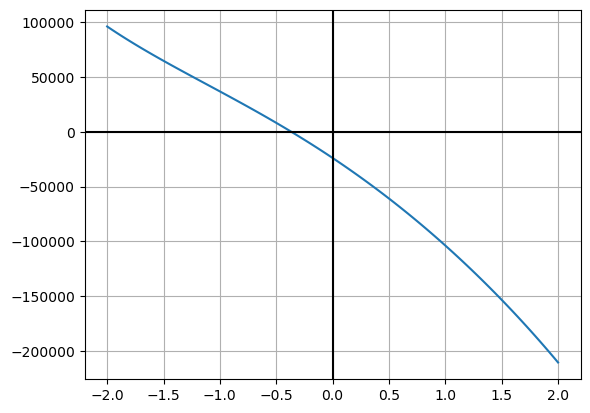

In [18]:
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals)

plt.grid()

ax.axhline(0, color='black', lw=1.5)
ax.axvline(0, color='black', lw=1.5)

        
plt.show()



## 112.4 :

In [19]:
x_vals = np.linspace(109, 115, 100)
y_vals = f(x_vals)

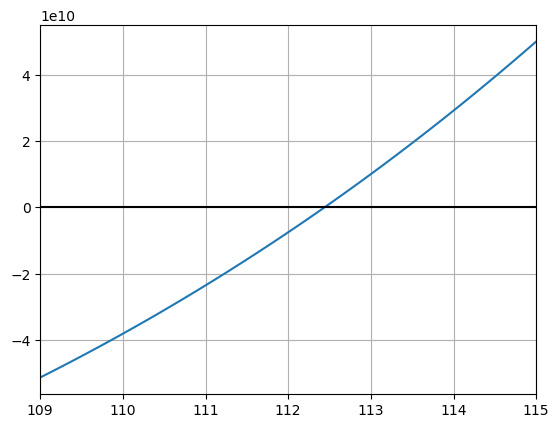

In [20]:
fig, ax = plt.subplots()

ax.plot(x_vals, y_vals)

plt.grid()

ax.axhline(0, color='black', lw=1.5)
ax.axvline(0, color='black', lw=1.5)

ax.set_xlim([109, 115])
      
plt.show()

# Завдання 4 
## Порівняти отримані результати з власними значеннями, обчисленими за допомогою функції (Eigenvalues ).


In [21]:
eigenvalues = A.eigenvals(multiple=True)
eigenvalues = [complex(val) for val in eigenvalues]
eigenvalues.sort(key=abs)  # sort by magnitude
print('\nВласні значення матриці:')
eigenvalues


Власні значення матриці:


[(-0.3669231144517527+0j),
 (-2.3592278112935046-2.7964811716048628j),
 (-2.3592278112935046+2.7964811716048628j),
 (4.323955330694408-4.960006909434768j),
 (4.323955330694408+4.960006909434768j),
 (112.43746807564995+0j)]

### Отримали такий самий розв'язок, як використовуючи пакет розв'язку рівнянь Sympy.solve()

# Завдання 5
## Використовуючи ітераційний метод, що базується на QR-перетворенні, отримати первісну декомпозицію матриці А на складові Q і R. Побудувати ітераційний процес, задаючись обмеженням на значення елементів, що знаходяться нижче головної діагоналі на рівні 0.05.


In [133]:
def chop(expr, tol):
    for i in range(len(expr)):
        for j in range(len(expr)):
            if -tol < expr[i][j] < tol and i > j:
                expr[i][j] = 0  
    return expr

In [131]:
B = np.array(A, dtype = float)
tol = 0.05

max_iter = 1000
for i in range(max_iter):
    Q, R = Matrix(B).QRdecomposition()
    Q = np.array(Q)
    R = np.array(R)
    R = chop(R, tolerance)
    B = R.dot(Q.T)
    print('______________________________________')
    print('ITERATION = ', i)
    print(chop(B, tolerance))
    print('______________________________________')


______________________________________
ITERATION =  0
[[112.153619783343 -0.183145239364205 -0.138183914999775 6.73575720015741
  0.473821362482310 -7.99129221674290]
 [-0.398962571648897 4.86459294724764 -4.37170281318165 3.88676314083245
  -0.661860343444018 -12.2334756645839]
 [0.196665344954658 -4.78319636242341 1.48441735203108 1.78792759407242
  3.97724759789622 0.276586707363948]
 [0.218635023301961 -2.46926825972481 -1.71577582921561 -2.13078730603222
  0.295993062578679 -0.405905696521873]
 [0.0186826701238321 0.220392839771255 -1.41215210189929 1.69293489685884
  3.90785058069572 -0.673842525029454]
 [0 -0.0368213181005184 0.261416244989287 -0.242062979286421
  -0.244544779080623 -0.0460007955444575]]
______________________________________
______________________________________
ITERATION =  1
[[112.160850757181 2.22014167664034 5.05895979573038 -3.30160695321731
  2.55301243258810 7.70227439022825]
 [0.0361487862806052 8.93535692424677 -1.63578590125674
  -0.726087160759822 -

______________________________________
ITERATION =  14
[[112.160363215582 1.59887550352677 -4.38160326853700 4.84134815214259
  1.62010975633227 -7.72048658161642]
 [0 9.32298332365360 -0.853233684025484 -0.258615562112550
  0.0206306267280710 -9.68845514844842]
 [0 0 -3.79003110487860 0 3.95669402966174 -6.44799369637400]
 [0 0 0.792352311180032 -3.58174286268888 -2.73396513112839
  1.13419672091461]
 [0 0 -0.0645866486240414 -0.287877099073106 2.88664712898036
  1.87289074503996]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  15
[[112.160363215582 1.59887550352677 3.25328276969721 -5.74928096043066
  1.27427407338153 7.72048658161642]
 [0 9.32298332365360 0.886735333549806 0.0760642358079025
  0.0568333664931056 9.68845514844842]
 [0 0 -3.49155149285456 1.86132706459566 -4.46553333554379
  -6.51149253287164]
 [0 0 -0.767164568413236 -3.56247206280029 1.31365547184078
  -0.0395528462893720]
 [0 0 -0.099841819

______________________________________
ITERATION =  32
[[112.160363215582 1.59887550352674 -4.41729986479810 4.86818979945436
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365357 -0.850128366785888 -0.266134579265012
  0.0420653894210219 -9.68845514844842]
 [0 0 -3.74137801877866 0.112913870413457 4.02809381511624
  -6.39428613164415]
 [0 0 0.842265096801182 -3.70529464117455 -2.47949610559311
  1.28622196338073]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  33
[[112.160363215582 1.59887550352675 3.24027174489805 -5.71947978738207
  1.43179772894603 7.72048658161642]
 [0 9.32298332365358 0.887821762318146 0.0729271735973277
  0.0420653894210219 9.68845514844842]
 [0 0 -3.53845915117629 1.74363949035762 -4.47430489765108
  -6.52065207412988]
 [0 0 -0.788460523142989 -3.50237577357219 1.53428693662061
  -0.149527925704133]
 [0 0 0 0 2.92367095413439 -1.95690638

______________________________________
ITERATION =  51
[[112.160363215582 1.59887550352670 3.33776462963253 -5.66313846698367
  1.43179772894603 7.72048658161642]
 [0 9.32298332365352 0.886442349435859 0.0881238640836822
  0.0420653894210219 9.68845514844843]
 [0 0 -3.57975904750881 1.62231267533027 -4.44736786051319
  -6.52225667486524]
 [0 0 -0.667133708115634 -3.54367566990478 1.61070165899940
  -0.0378145421175846]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  52
[[112.160363215582 1.59887550352670 -4.31880440967919 4.95577829306274
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365352 -0.855293485008570 -0.249035958841947
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.75300501430412 0.262483263018401 4.07699811309004
  -6.41878955816030]
 [0 0 0.692695704196237 -3.71692163670008 -2.39823416431535
  1.15775760868675]
 [0 0 0 0 2.92367095413439 1.9569063

______________________________________
ITERATION =  70
[[112.160363215582 1.59887550352662 -4.24408661435999 5.01991422524996
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365341 -0.858927868975288 -0.236196465240516
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.75777243982416 0.374460249917624 4.11246416485651
  -6.43466890524206]
 [0 0 0.580718717297011 -3.72168906222008 -2.33689520813411
  1.06596317958887]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  71
[[112.160363215582 1.59887550352662 3.42763115280415 -5.60920267947086
  1.43179772894603 7.72048658161642]
 [0 9.32298332365341 0.884924665207811 0.102245739282328
  0.0420653894210219 9.68845514844843]
 [0 0 -3.61444564597474 1.50817199161647 -4.42112219589613
  -6.52198127299502]
 [0 0 -0.552993024401837 -3.57836226837066 1.68140395205426
  0.0707226627786956]
 [0 0 0 0 2.92367095413439 -1.956906380

______________________________________
ITERATION =  89
[[112.160363215582 1.59887550352655 3.49466454388678 -5.56768621105374
  1.43179772894603 7.72048658161642]
 [0 9.32298332365332 0.883634612477725 0.112852673544152
  0.0420653894210219 9.68845514844844]
 [0 0 -3.63813182562102 1.42160703126645 -4.40063643678999
  -6.52066381063084]
 [0 0 -0.466428064051789 -3.60204844801687 1.73431244942351
  0.148945926622968]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  90
[[112.160363215582 1.59887550352655 -4.17430593936490 5.07808821739445
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365333 -0.862110082349483 -0.224303500209264
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.75919413930087 0.477856146584826 4.14436737913241
  -6.44878602887367]
 [0 0 0.477322820629832 -3.72311076169670 -2.27983765821434
  0.976934068467242]
 [0 0 0 0 2.92367095413439 1.956906380

______________________________________
ITERATION =  108
[[112.160363215582 1.59887550352656 -4.12167240910465 5.12090095306312
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365334 -0.864379210604164 -0.215393673468002
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.75839158982138 0.555077204744421 4.16767694986038
  -6.45852552782212]
 [0 0 0.400101762470244 -3.72230821221723 -2.23694201145930
  0.910323803269058]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  109
[[112.160363215582 1.59887550352656 3.55642856315815 -5.52843792532848
  1.43179772894603 7.72048658161642]
 [0 9.32298332365334 0.882323560334718 0.122682472965758
  0.0420653894210219 9.68845514844844]
 [0 0 -3.65825125223387 1.34077895486026 -4.38105704885375
  -6.51860166401095]
 [0 0 -0.385599987645599 -3.62216787462971 1.78319372355275
  0.221525994596402]
 [0 0 0 0 2.92367095413439 -1.9569063

______________________________________
ITERATION =  127
[[112.160363215582 1.59887550352657 3.60250078570992 -5.49852690345480
  1.43179772894603 7.72048658161642]
 [0 9.32298332365336 0.881267604021047 0.130051006907457
  0.0420653894210219 9.68845514844844]
 [0 0 -3.67216825321920 1.27982434959297 -4.36600348013882
  -6.51652297751968]
 [0 0 -0.324645382378319 -3.63608487561508 1.81974018267576
  0.275988593579910]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  128
[[112.160363215582 1.59887550352657 -4.07272424216331 5.15991543209307
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365336 -0.866391005949082 -0.207153274425465
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.75623771160857 0.626291279345096 4.18878820765695
  -6.46690084703917]
 [0 0 0.328887687869553 -3.72015433400445 -2.19715590535201
  0.848784339448095]
 [0 0 0 0 2.92367095413439 1.9569063

______________________________________
ITERATION =  143
[[112.160363215582 1.59887550352665 3.63712668250224 -5.47568438777171
  1.43179772894603 7.72048658161642]
 [0 9.32298332365345 0.880429390333298 0.135609523750933
  0.0420653894210219 9.68845514844843]
 [0 0 -3.68200179739940 1.23364374858386 -4.35443335524592
  -6.51465164623965]
 [0 0 -0.278464781369227 -3.64591841979530 1.84725495688896
  0.317104633323540]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  144
[[112.160363215582 1.59887550352665 -4.03970876535063 5.18580399843706
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365345 -0.867695489948019 -0.201619421233266
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.75403505959098 0.673995345034689 4.20272596939473
  -6.47218639355009]
 [0 0 0.281183622179942 -3.71795168198689 -2.17037672932701
  0.807492852893013]
 [0 0 0 0 2.92367095413439 1.9569063

______________________________________
ITERATION =  162
[[112.160363215582 1.59887550352666 -4.00809991609417 5.21027303331241
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365347 -0.868905467421563 -0.196339356675032
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.75137017889606 0.719416103387721 4.21584602909787
  -6.47697698473040]
 [0 0 0.235762863826902 -3.71528680129194 -2.14478040367047
  0.768121448470782]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  163
[[112.160363215582 1.59887550352666 3.67340180671402 -5.45141533782621
  1.43179772894603 7.72048658161642]
 [0 9.32298332365347 0.879509618050058 0.141452062735433
  0.0420653894210219 9.68845514844843]
 [0 0 -3.69171805095865 1.18492512890870 -4.34207270355184
  -6.51240266983893]
 [0 0 -0.229746161694074 -3.65563467335453 1.87612509127166
  0.360351059666853]
 [0 0 0 0 2.92367095413439 -1.9569063

______________________________________
ITERATION =  181
[[112.160363215582 1.59887550352666 3.70047830081680 -5.43307190862045
  1.43179772894603 7.72048658161642]
 [0 9.32298332365347 0.878794978560222 0.145826060606244
  0.0420653894210219 9.68845514844843]
 [0 0 -3.69857438901368 1.14833591233787 -4.33268484031122
  -6.51052924575998]
 [0 0 -0.193156945123236 -3.66249101140958 1.89770461230573
  0.392747196593666]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  182
[[112.160363215582 1.59887550352666 -3.97879663284834 5.23268452837465
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365347 -0.869993645058298 -0.191459948429995
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.74842078835601 0.761303252383119 4.22781619427443
  -6.48118570269857]
 [0 0 0.193875714831512 -3.71233741075190 -2.12108720906520
  0.731760416710159]
 [0 0 0 0 2.92367095413439 1.9569063

______________________________________
ITERATION =  215
[[112.160363215582 1.59887550352659 3.74023556181273 -5.40577912619523
  1.43179772894603 7.72048658161642]
 [0 9.32298332365340 0.877701556296178 0.152268947490716
  0.0420653894210219 9.68845514844844]
 [0 0 -3.70801912525736 1.09426463912498 -4.31864675579166
  -6.50747287632183]
 [0 0 -0.139085671910357 -3.67193574765324 1.92943798027282
  0.440497655230868]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  216
[[112.160363215582 1.59887550352660 -3.94023234354132 5.26178478255882
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365340 -0.871377255613577 -0.185060889152726
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.74384769929599 0.816102852839946 4.24329062841899
  -6.48638863038090]
 [0 0 0.139076114374672 -3.70776432169187 -2.08995822058736
  0.684108146416685]
 [0 0 0 0 2.92367095413439 1.9569063

______________________________________
ITERATION =  232
[[112.160363215582 1.59887550352660 -3.92601328246739 5.27240265201229
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365341 -0.871873670372408 -0.182707846591299
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.74196569991778 0.836214201687152 4.24891721303781
  -6.48821181141195]
 [0 0 0.118964765527454 -3.70588232231364 -2.07849542645157
  0.666595012419613]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  233
[[112.160363215582 1.59887550352661 3.75649485676382 -5.39449315600304
  1.43179772894603 7.72048658161642]
 [0 9.32298332365341 0.877239111641853 0.154910926988664
  0.0420653894210219 9.68845514844844]
 [0 0 -3.71166569715754 1.07203326890747 -4.31281783979241
  -6.50611708606183]
 [0 0 -0.116854301692861 -3.67558231955341 1.94243223866303
  0.460088994415865]
 [0 0 0 0 2.92367095413439 -1.9569063

______________________________________
ITERATION =  251
[[112.160363215582 1.59887550352669 3.77012789397938 -5.38497406512738
  1.43179772894603 7.72048658161642]
 [0 9.32298332365351 0.876844467202608 0.157129356361772
  0.0420653894210220 9.68845514844843]
 [0 0 -3.71462564483735 1.05334011101813 -4.30789077435685
  -6.50493250456270]
 [0 0 -0.0981611438035309 -3.67854226723329 1.95333504479909
  0.476544364578869]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  252
[[112.160363215582 1.59887550352669 -3.91106363479075 5.28350179934420
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365351 -0.872387686580267 -0.180237561561487
  0.0420653894210220 -9.68845514844843]
 [0 0 -3.73987437072180 0.857304135386268 4.25478743539515
  -6.49007389173728]
 [0 0 0.0978748318283294 -3.70379099311774 -2.06645217719469
  0.648214702176955]
 [0 0 0 0 2.92367095413439 1.95690

______________________________________
ITERATION =  270
[[112.160363215582 1.59887550352669 -3.89986801016249 5.29177092497091
  1.43179772894603 -7.72048658161642]
 [0 9.32298332365351 -0.872767351488564 -0.178390034671758
  0.0420653894210220 -9.68845514844843]
 [0 0 -3.73823305011255 0.873061308409522 4.25915323631893
  -6.49143182129389]
 [0 0 0.0821176588050756 -3.70214967250847 -2.05743880360586
  0.634471693475264]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  271
[[112.160363215582 1.59887550352669 3.78271126967037 -5.37614224787300
  1.43179772894603 7.72048658161642]
 [0 9.32298332365351 0.876474595338199 0.159179577902762
  0.0420653894210220 9.68845514844843]
 [0 0 -3.71727818466026 1.03604366856107 -4.30331078441460
  -6.50380023478332]
 [0 0 -0.0808647013464695 -3.68119480705618 1.96340444477701
  0.491755962201381]
 [0 0 0 0 2.92367095413439 -1.95690

______________________________________
ITERATION =  286
[[112.160363215581 1.59887550352670 -3.89142713390482 5.29798120802305
  1.43179772894603 -7.72048658161643]
 [0 9.32298332365352 -0.873050624451530 -0.176998478635471
  0.0420653894210220 -9.68845514844843]
 [0 0 -3.73695325374260 0.884920431526690 4.26242770758431
  -6.49243502116637]
 [0 0 0.0702585356879178 -3.70086987613855 -2.05064642458098
  0.624122517027468]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  287
[[112.160363215581 1.59887550352670 3.79114969372004 -5.37019497028391
  1.43179772894603 7.72048658161643]
 [0 9.32298332365352 0.876223527167813 0.160555861718205
  0.0420653894210220 9.68845514844843]
 [0 0 -3.71901400998304 1.02442182247697 -4.30022200296994
  -6.50301992463312]
 [0 0 -0.0692428552623653 -3.68293063237899 1.97016025901508
  0.501969401610107]
 [0 0 0 0 2.92367095413439 -1.95690

______________________________________
ITERATION =  302
[[112.160363215581 1.59887550352671 -3.88419722475806 5.30328407104859
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365354 -0.873291233010646 -0.175807498819761
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.73582824266212 0.895063876736768 4.26522076357208
  -6.49328026646262]
 [0 0 0.0601150904778226 -3.69974486505806 -2.04483069201896
  0.615266447561806]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  303
[[112.160363215581 1.59887550352673 3.79836767837932 -5.36509207739245
  1.43179772894604 7.72048658161643]
 [0 9.32298332365357 0.876006832149526 0.161733992474952
  0.0420653894210219 9.68845514844843]
 [0 0 -3.72047129745002 1.01446630559584 -4.29756879968171
  -6.50233903636145]
 [0 0 -0.0592873383812478 -3.68438791984594 1.97594107529335
  0.510713693313885]
 [0 0 0 0 2.92367095413439 -1.95690

______________________________________
ITERATION =  321
[[112.160363215581 1.59887550352683 3.80524849543786 -5.36021397959301
  1.43179772894604 7.72048658161643]
 [0 9.32298332365369 0.875798590336945 0.162857862746814
  0.0420653894210219 9.68845514844842]
 [0 0 -3.72183683750367 1.00496337890015 -4.29502993421533
  -6.50167838763928]
 [0 0 -0.0497844116855495 -3.68575345989955 1.98145365457368
  0.519056417003503]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  322
[[112.160363215581 1.59887550352683 -3.87660153794286 5.30883890649127
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365369 -0.873542008513072 -0.174557193084580
  0.0420653894210219 -9.68845514844842]
 [0 0 -3.73461776875950 0.905706256077185 4.26814359005608
  -6.49415437377339]
 [0 0 0.0494727111374232 -3.69853439115539 -2.03872288840155
  0.605970618040263]
 [0 0 0 0 2.92367095413439 1.95690

______________________________________
ITERATION =  337
[[112.160363215581 1.59887550352679 3.81042885559854 -5.35653264299568
  1.43179772894604 7.72048658161643]
 [0 9.32298332365364 0.875640733604850 0.163704489695945
  0.0420653894210219 9.68845514844842]
 [0 0 -3.72284962070505 0.997800898986318 -4.29311230065574
  -6.50117353673673]
 [0 0 -0.0426219317717187 -3.68676624310092 1.98560507024623
  0.525341855901749]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  338
[[112.160363215581 1.59887550352679 -3.87150067960213 5.31255988266453
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365364 -0.873709265472566 -0.173718086916832
  0.0420653894210219 -9.68845514844842]
 [0 0 -3.73378851069752 0.912844908106190 4.27009978791352
  -6.49473340506665]
 [0 0 0.0423340591084081 -3.69770513309340 -2.03462245202642
  0.599732788364639]
 [0 0 0 0 2.92367095413439 1.9569

______________________________________
ITERATION =  354
[[112.160363215581 1.59887550352677 -3.86713294167960 5.31574010185151
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365361 -0.873851750478675 -0.172999920461956
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.73306801175576 0.918952314782029 4.27177061609726
  -6.49522413595789]
 [0 0 0.0362266524325662 -3.69698463415170 -2.03111213980842
  0.594394518815828]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  355
[[112.160363215581 1.59887550352674 3.81536798474364 -5.35301570706167
  1.43179772894604 7.72048658161643]
 [0 9.32298332365358 0.875489363627928 0.164512092165953
  0.0420653894210219 9.68845514844843]
 [0 0 -3.72380297988680 0.990965547014366 -4.29127899515465
  -6.50068620720939]
 [0 0 -0.0357865797997694 -3.68771960228275 1.98956409968957
  0.531338174542257]
 [0 0 0 0 2.92367095413439 -1.9569

______________________________________
ITERATION =  373
[[112.160363215581 1.59887550352674 3.81951242542348 -5.35005933154870
  1.43179772894604 7.72048658161643]
 [0 9.32298332365358 0.875361696486394 0.165190056053108
  0.0420653894210219 9.68845514844843]
 [0 0 -3.72459369156684 0.985225159837360 -4.28973691200473
  -6.50027276872301]
 [0 0 -0.0300461926227498 -3.68851031396283 1.99288683743289
  0.536372400973724]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  374
[[112.160363215581 1.59887550352677 -3.86254552614670 5.31907436284734
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365361 -0.874000675160358 -0.172245969803628
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.73230094005413 0.925361684027882 4.27352130025140
  -6.49573451275370]
 [0 0 0.0298172831867322 -3.69621756245013 -2.02742605717859
  0.588790760923343]
 [0 0 0 0 2.92367095413439 1.9569

______________________________________
ITERATION =  392
[[112.160363215581 1.59887550352670 -3.85911316383751 5.32156514643497
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365352 -0.874111616393877 -0.171682079378019
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.73172009501992 0.930153759895272 4.27482838870095
  -6.49611301463837]
 [0 0 0.0250252073193362 -3.69563671741595 -2.02466860700351
  0.584599966963986]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  393
[[112.160363215581 1.59887550352669 3.82334036136303 -5.34732442444141
  1.43179772894604 7.72048658161643]
 [0 9.32298332365352 0.875243249594774 0.165816489930963
  0.0420653894210219 9.68845514844843]
 [0 0 -3.72531650073443 0.979919253571805 -4.28830955025844
  -6.49988723466416]
 [0 0 -0.0247402863571993 -3.68923312313047 1.99595639285817
  0.541024358950808]
 [0 0 0 0 2.92367095413439 -1.9569

______________________________________
ITERATION =  411
[[112.160363215581 1.59887550352657 3.82620263442500 -5.34527673926934
  1.43179772894604 7.72048658161643]
 [0 9.32298332365337 0.875154350245071 0.166285049060878
  0.0420653894210219 9.68845514844844]
 [0 0 -3.72585224452767 0.975949405581315 -4.28724035158614
  -6.49959665251523]
 [0 0 -0.0207704383667103 -3.68976886692379 1.99825195827771
  0.544504155118375]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  412
[[112.160363215581 1.59887550352657 -3.85594093282812 5.32386415506588
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365337 -0.874213780216504 -0.171161095969979
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.73117801859074 0.934579992681327 4.27603429121962
  -6.49646027076055]
 [0 0 0.0205989745332783 -3.69509464098685 -2.02212053580964
  0.580728310622166]
 [0 0 0 0 2.92367095413439 1.9569

______________________________________
ITERATION =  427
[[112.160363215581 1.59887550352661 3.82835815897707 -5.34373313570658
  1.43179772894604 7.72048658161643]
 [0 9.32298332365342 0.875087213642799 0.166637999306690
  0.0420653894210219 9.68845514844844]
 [0 0 -3.72625303132307 0.972958404896060 -4.28643407586837
  -6.49937651664148]
 [0 0 -0.0177794376814425 -3.69016965371918 1.99998090847478
  0.547125502291365]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  428
[[112.160363215581 1.59887550352661 -3.85381137045768 5.32540589438833
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365342 -0.874282165359409 -0.170811444664921
  0.0420653894210219 -9.68845514844844]
 [0 0 -3.73081128840949 0.937549948442175 4.27684268665751
  -6.49669201069354]
 [0 0 0.0176290187724397 -3.69472791080561 -2.02041019464198
  0.578130035994563]
 [0 0 0 0 2.92367095413439 1.9569

______________________________________
ITERATION =  446
[[112.160363215581 1.59887550352677 -3.85177975212662 5.32687551573738
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365362 -0.874347256559228 -0.170477943563047
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.73045931077366 0.940382233178002 4.27761304653045
  -6.49691206162862]
 [0 0 0.0147967340366092 -3.69437593316974 -2.01877867662149
  0.575651877259932]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  447
[[112.160363215581 1.59887550352675 3.83062075689914 -5.34211143985865
  1.43179772894604 7.72048658161643]
 [0 9.32298332365358 0.875016568032015 0.167008562545917
  0.0420653894210219 9.68845514844843]
 [0 0 -3.72667125469937 0.969817552629125 -4.28558674818222
  -6.49914423950770]
 [0 0 -0.0146385854145086 -3.69058787709543 2.00179592986750
  0.549877781331554]
 [0 0 0 0 2.92367095413439 -1.9569

______________________________________
ITERATION =  465
[[112.160363215581 1.59887550352679 3.83231276709307 -5.34089775920033
  1.43179772894604 7.72048658161643]
 [0 9.32298332365363 0.874963621400602 0.167285730173907
  0.0420653894210219 9.68845514844842]
 [0 0 -3.72698235323344 0.967467914147209 -4.28495243111870
  -6.49896973053719]
 [0 0 -0.0122889469325805 -3.69089897562947 2.00315336009977
  0.551936465446566]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  466
[[112.160363215581 1.59887550352679 -3.84990233518115 5.32823254265637
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365363 -0.874407278275771 -0.170169815163089
  0.0420653894210219 -9.68845514844842]
 [0 0 -3.73013221470327 0.942998611682195 4.27832419354654
  -6.49711451652265]
 [0 0 0.0121803555324297 -3.69404883709929 -2.01727113099440
  0.573362345745568]
 [0 0 0 0 2.92367095413439 1.9569

______________________________________
ITERATION =  484
[[112.160363215581 1.59887550352678 -3.84849793067516 5.32924701028621
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365362 -0.874452096644978 -0.169939356734880
  0.0420653894210219 -9.68845514844843]
 [0 0 -3.72988637923601 0.944955210932363 4.27885570248814
  -6.49726540214995]
 [0 0 0.0102237562822572 -3.69380300163205 -2.01614349645898
  0.571649992874557]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  485
[[112.160363215581 1.59887550352678 3.83387586537988 -5.33977582562352
  1.43179772894604 7.72048658161643]
 [0 9.32298332365362 0.874914619961815 0.167541821857590
  0.0420653894210219 9.68845514844843]
 [0 0 -3.72726848919288 0.965296641893313 -4.28436593145551
  -6.49880790224023]
 [0 0 -0.0101176746786871 -3.69118511158890 2.00440746516583
  0.553838667942380]
 [0 0 0 0 2.92367095413439 -1.9569

______________________________________
ITERATION =  505
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  506
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  529
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  530
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  549
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  550
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  573
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  574
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  597
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  598
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  617
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  618
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  637
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  638
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  657
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  658
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  677
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  678
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  698
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
___________

______________________________________
ITERATION =  717
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  718
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  737
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  738
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  761
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  762
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  785
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  786
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  805
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  806
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  825
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  826
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  846
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
___________

______________________________________
ITERATION =  865
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  866
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  885
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  886
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  906
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  907
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  930
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  931
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435

______________________________________
ITERATION =  950
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  951
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435

[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  971
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
___________

______________________________________
ITERATION =  990
[[112.160363215581 1.59887550352661 -3.83401608870590 5.33967514466939
  1.43179772894604 -7.72048658161643]
 [0 9.32298332365341 -0.874910219944938 -0.167564797407524
  0.0420653894210220 -9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 -2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 1.95690638014415]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  991
[[112.160363215581 1.59887550352661 3.83401608870590 -5.33967514466939
  1.43179772894604 7.72048658161643]
 [0 9.32298332365341 0.874910219944938 0.167564797407524
  0.0420653894210220 9.68845514844844]
 [0 0 -3.72729409884696 0.965101829663383 -4.28431329343688
  -6.49879335597457]
 [0 0 0 -3.69121072124297 2.00451997363688 0.554009329045049]
 [0 0 0 0 2.92367095413439 -1.95690638014415]
 [0 0 0 0 0 -0.554477947435

In [132]:
Matrix(B)

Matrix([
[112.160363215581, 1.59887550352661,   3.8340160887059, -5.33967514466939,  1.43179772894604,   7.72048658161643],
[               0, 9.32298332365341, 0.874910219944938, 0.167564797407524, 0.042065389421022,   9.68845514844844],
[               0,                0, -3.72729409884696, 0.965101829663383, -4.28431329343688,  -6.49879335597457],
[               0,                0,                 0, -3.69121072124297,  2.00451997363688,  0.554009329045049],
[               0,                0,                 0,                 0,  2.92367095413439,  -1.95690638014415],
[               0,                0,                 0,                 0,                 0, -0.554477947435418]])

# Завдання 6
## Визначити кількість ітерацій, яка необхідна для досягнення розбіжності між точними і отриманими значеннями на рівні 0.01.


In [178]:
B = np.array(A, dtype = float)
tolerance = 0.01

max_iter = 488
for i in range(max_iter):
    Q, R = Matrix(B).QRdecomposition()
    Q = np.array(Q)
    R = np.array(R)
    R = chop(R, tolerance)
    B = R.dot(Q.T)
  
        
    print('______________________________________')
    print('ITERATION = ', i)
    print(chop(B, tolerance))
    print('______________________________________')


______________________________________
ITERATION =  0
[[112.153619783343 -0.183145239364205 -0.138183914999775 6.73575720015741
  0.473821362482310 -7.99129221674290]
 [-0.398962571648897 4.86459294724764 -4.37170281318165 3.88676314083245
  -0.661860343444018 -12.2334756645839]
 [0.196665344954658 -4.78319636242341 1.48441735203108 1.78792759407242
  3.97724759789622 0.276586707363948]
 [0.218635023301961 -2.46926825972481 -1.71577582921561 -2.13078730603222
  0.295993062578679 -0.405905696521873]
 [0.0186826701238321 0.220392839771255 -1.41215210189929 1.69293489685884
  3.90785058069572 -0.673842525029454]
 [0 -0.0368213181005184 0.261416244989287 -0.242062979286421
  -0.244544779080623 -0.0460007955444575]]
______________________________________
______________________________________
ITERATION =  1
[[112.160850757181 2.22014167664034 5.05895979573038 -3.30160695321731
  2.55301243258810 7.70227439022825]
 [0.0361487862806052 8.93535692424677 -1.63578590125674
  -0.726087160759822 -

______________________________________
ITERATION =  14
[[112.160363215582 1.59887550352677 -4.38160326853700 4.84134815214259
  1.62010975633227 -7.72048658161642]
 [0 9.32298332365360 -0.853188596113607 -0.258496819664197
  0.0239838535153865 -9.68845514844842]
 [0 0 -3.79003110487860 0.000351194830133825 3.95669402966174
  -6.44799369637400]
 [0 0 0.792352311180032 -3.58174286268888 -2.73396513112839
  1.13419672091461]
 [0 0 -0.0645866486240414 -0.287877099073106 2.88664712898036
  1.87289074503996]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  15
[[112.160363215582 1.59887550352677 3.25328221498655 -5.74928497462672
  1.27425737818356 7.72048658161642]
 [0 9.32298332365360 0.886554056536007 0.0756889806351881
  0.0601638977643383 9.68845514844842]
 [0 0 -3.49147892021103 1.86167689142697 -4.46550030206100
  -6.51149253287164]
 [0 0 -0.767150535749325 -3.56240625521538 1.31363934713490
  -0.039546141541149

______________________________________
ITERATION =  32
[[112.160363215582 1.59887550352670 -4.41732032236847 4.86817092483924
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365352 -0.850049690846376 -0.265857531912422
  0.0454082301093568 -9.68845514844843]
 [0 0 -3.74139475639518 0.111616159821476 4.02808327116488
  -6.39428061465980]
 [0 0 0.842296132730068 -3.70531037788120 -2.47951435825207
  1.28624773918124]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  33
[[112.160363215582 1.59887550352673 3.24025617451251 -5.71948834314691
  1.43179878887077 7.72048658161642]
 [0 9.32298332365355 0.887684664834039 0.0726680122275771
  0.0454082301093568 9.68845514844842]
 [0 0 -3.53874146707777 1.74246167375061 -4.47430926266959
  -6.52065131566822]
 [0 0 -0.788549381199059 -3.50265708856377 1.53427602282172
  -0.149546798819690]
 [0 0 0 0 2.92367000021096 -1.95690746

______________________________________
ITERATION =  51
[[112.160363215582 1.59887550352663 3.33775416164236 -5.66314436866112
  1.43179878887077 7.72048658161642]
 [0 9.32298332365342 0.886309634354860 0.0878631676657328
  0.0454082301093568 9.68845514844843]
 [0 0 -3.58002454974869 1.62111929393554 -4.44737100295755
  -6.52225627288058]
 [0 0 -0.667207001384027 -3.54394017123474 1.61069471169085
  -0.0378277204305870]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  52
[[112.160363215582 1.59887550352660 -4.31882705831313 4.95575824917249
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365339 -0.855209178876225 -0.248760858151557
  0.0454082301093568 -9.68845514844843]
 [0 0 -3.75304821675300 0.261183999127262 4.07698705804589
  -6.41878413465726]
 [0 0 0.692728293424253 -3.71696383823907 -2.39825411930070
  1.15778584299309]
 [0 0 0 0 2.92367000021096 1.9569074

______________________________________
ITERATION =  69
[[112.160363215582 1.59887550352652 3.41941461460142 -5.61421505442287
  1.43179878887077 7.72048658161642]
 [0 9.32298332365328 0.884944309906096 0.100688989204956
  0.0454082301093568 9.68845514844844]
 [0 0 -3.61166534188103 1.51748499346867 -4.42357947496909
  -6.52212013914684]
 [0 0 -0.563572700917158 -3.57558096336716 1.67493012416897
  0.0566278738635518]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  70
[[112.160363215582 1.59887550352652 -4.24411024615548 5.01989394333549
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365328 -0.858839419316979 -0.235922775521087
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.75783554252892 0.373161542662504 4.11245309085701
  -6.43540647010637]
 [0 0 0.580750749889007 -3.72175116401505 -2.33691588802788
  1.06150901554163]
 [0 0 0 0 2.92367000021096 1.956907465

______________________________________
ITERATION =  85
[[112.160363215582 1.59887550352654 3.48077662958261 -5.57637884642083
  1.43179878887077 7.72048658161642]
 [0 9.32298332365330 0.883786901883006 0.110387572861648
  0.0454082301093568 9.68845514844844]
 [0 0 -3.63362129609074 1.43842136516998 -4.40494554824163
  -6.52110694422737]
 [0 0 -0.484509072618464 -3.59753691757688 1.72334007359046
  0.128148536911912]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  86
[[112.160363215582 1.59887550352654 -4.18727382969860 5.06740020710614
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365330 -0.861443398395180 -0.226229917437146
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.75922486398535 0.457466681726640 4.13852564638862
  -6.44695954437545]
 [0 0 0.496445610824877 -3.72314048547149 -2.29042611022495
  0.988923889260089]
 [0 0 0 0 2.92367000021096 1.956907465

______________________________________
ITERATION =  104
[[112.160363215582 1.59887550352654 -4.13263968792351 5.11205400926651
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365330 -0.863822097690740 -0.216970246170978
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.75878114432930 0.537781428196240 4.16287240717445
  -6.45720313568757]
 [0 0 0.416130864355261 -3.72269676581542 -2.24587168239909
  0.919665966549673]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  105
[[112.160363215582 1.59887550352654 3.54503071409030 -5.53575326581802
  1.43179878887077 7.72048658161642]
 [0 9.32298332365330 0.882451250849709 0.120600555787000
  0.0454082301093568 9.68845514844844]
 [0 0 -3.65489008404598 1.35454661744395 -4.38472179847333
  -6.51918894068789]
 [0 0 -0.400634324892443 -3.61880570553209 1.77416488585739
  0.203551912729517]
 [0 0 0 0 2.92367000021096 -1.9569074

______________________________________
ITERATION =  121
[[112.160363215582 1.59887550352652 3.58804389584058 -5.50797131304977
  1.43179878887077 7.72048658161642]
 [0 9.32298332365327 0.881485060864514 0.127470748232482
  0.0454082301093568 9.68845514844844]
 [0 0 -3.66812030512083 1.29778340764560 -4.37076892028492
  -6.51740559068260]
 [0 0 -0.343871115094095 -3.63203592660697 1.80826583711797
  0.254326939395443]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  122
[[112.160363215582 1.59887550352649 -4.08647615320369 5.14903094117289
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365323 -0.865739343611863 -0.209189132377323
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.75708094740018 0.605084246312688 4.18291136590791
  -6.46521654490279]
 [0 0 0.348828046238820 -3.72099656888632 -2.20832488487880
  0.861529368668459]
 [0 0 0 0 2.92367000021096 1.9569074

______________________________________
ITERATION =  140
[[112.160363215582 1.59887550352643 -4.04752205922164 5.17970772958979
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365315 -0.867292577031809 -0.202653127308112
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.75472267557931 0.661473321774197 4.19944921448859
  -6.47153092881572]
 [0 0 0.292438970777312 -3.71863829706547 -2.17671141567909
  0.812739357324721]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  141
[[112.160363215582 1.59887550352643 3.63309439071821 -5.47836035068797
  1.43179878887077 7.72048658161642]
 [0 9.32298332365315 0.880410023029951 0.134695566113575
  0.0454082301093568 9.68845514844844]
 [0 0 -3.68109215765785 1.23780604863130 -4.35579225311886
  -6.51510066721156]
 [0 0 -0.283893756079789 -3.64500777914400 1.84404992879430
  0.307767967245695]
 [0 0 0 0 2.92367000021096 -1.9569074

______________________________________
ITERATION =  159
[[112.160363215582 1.59887550352642 3.66671121193696 -5.45591750965078
  1.43179878887077 7.72048658161643]
 [0 9.32298332365314 0.879565159527941 0.140106510651212
  0.0454082301093568 9.68845514844844]
 [0 0 -3.69017166704042 1.19270243045056 -4.34437116218518
  -6.51308509159472]
 [0 0 -0.238790137899049 -3.65408728852656 1.87079809102703
  0.347822390322593]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  160
[[112.160363215582 1.59887550352642 -4.01137260254279 5.20775352982716
  1.43179878887077 -7.72048658161643]
 [0 9.32298332365314 -0.868682060769890 -0.196611753155406
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.75179217760764 0.713469717572398 4.21449768097564
  -6.47703094381143]
 [0 0 0.240442574979117 -3.71570779909379 -2.14742999636019
  0.767677001395957]
 [0 0 0 0 2.92367000021096 1.9569074

______________________________________
ITERATION =  175
[[112.160363215582 1.59887550352636 3.69198547403470 -5.43884640740802
  1.43179878887077 7.72048658161642]
 [0 9.32298332365306 0.878905642615831 0.144185906247391
  0.0454082301093568 9.68845514844845]
 [0 0 -3.69665517008739 1.15859694771174 -4.33564449172490
  -6.51140120306483]
 [0 0 -0.204684655160236 -3.66057079157351 1.89093446041689
  0.378037297483991]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  176
[[112.160363215582 1.59887550352636 -3.98702849909502 5.22641471099094
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365306 -0.869590033870507 -0.192556166287762
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.74942236799963 0.748303905807302 4.22447214186206
  -6.48054256612517]
 [0 0 0.205608386744207 -3.71333798948575 -2.12774091816836
  0.737445505920870]
 [0 0 0 0 2.92367000021096 1.9569074

______________________________________
ITERATION =  194
[[112.160363215582 1.59887550352633 -3.96374871677597 5.24409220877311
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365302 -0.870437678436658 -0.188687445634421
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.74686161784057 0.781477596970987 4.23389182811300
  -6.48375770328915]
 [0 0 0.172434695580510 -3.71077723932673 -2.10893486861366
  0.708621105106004]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  195
[[112.160363215582 1.59887550352635 3.71847414853883 -5.42077088526221
  1.43179878887077 7.72048658161642]
 [0 9.32298332365305 0.878191794737678 0.148471801489920
  0.0454082301093568 9.68845514844845]
 [0 0 -3.70313056865091 1.12267379430143 -4.32636825732643
  -6.50947952347125]
 [0 0 -0.168761501749931 -3.66704619013707 1.91206275896342
  0.409797705058908]
 [0 0 0 0 2.92367000021096 -1.9569074

______________________________________
ITERATION =  213
[[112.160363215582 1.59887550352635 3.73825406828671 -5.40714929558968
  1.43179878887077 7.72048658161643]
 [0 9.32298332365306 0.877643493297416 0.151679276287280
  0.0454082301093568 9.68845514844845]
 [0 0 -3.70775040713379 1.09572986246652 -4.31935367923196
  -6.50793888690200]
 [0 0 -0.141817569915038 -3.67166602861992 1.92785634473160
  0.433577294045600]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  214
[[112.160363215582 1.59887550352635 -3.94218924310726 5.26031852223681
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365306 -0.871204874055010 -0.185112861803669
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.74423596636330 0.812079377894236 4.24251296645432
  -6.48661184422811]
 [0 0 0.141832914657252 -3.70815158784942 -2.09153771701194
  0.682000445661665]
 [0 0 0 0 2.92367000021096 1.9569074

______________________________________
ITERATION =  232
[[112.160363215582 1.59887550352634 -3.92603311763021 5.27238759416733
  1.43179878887077 -7.72048658161642]
 [0 9.32298332365304 -0.871768662600702 -0.182439313443877
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.74210966070193 0.834935353831639 4.24890940981194
  -6.48867355725641]
 [0 0 0.118976938719868 -3.70602528218799 -2.07851271812998
  0.662097646064769]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  233
[[112.160363215582 1.59887550352634 3.75650422078890 -5.39448635395940
  1.43179878887077 7.72048658161642]
 [0 9.32298332365304 0.877125937597260 0.154644087428724
  0.0454082301093569 9.68845514844845]
 [0 0 -3.71184796257051 1.07077981871775 -4.31281452909854
  -6.50643661429938]
 [0 0 -0.116867526166237 -3.67576358405655 1.94244102350961
  0.455566032170299]
 [0 0 0 0 2.92367000021096 -1.9569074

______________________________________
ITERATION =  248
[[112.160363215582 1.59887550352634 -3.91384656750764 5.28144033667597
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365304 -0.872187664217286 -0.180425559635513
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.74041650330811 0.852132252936883 4.25369820792910
  -6.49018530595092]
 [0 0 0.101780039614639 -3.70433212479413 -2.06869472085112
  0.647110902382059]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  249
[[112.160363215582 1.59887550352634 3.76873891744509 -5.38594596667977
  1.43179878887078 7.72048658161642]
 [0 9.32298332365304 0.876772667894237 0.156634584355514
  0.0454082301093569 9.68845514844845]
 [0 0 -3.71450560985745 1.05400538601166 -4.30839447815260
  -6.50538581271293]
 [0 0 -0.100093093460139 -3.67842123134346 1.95222522082896
  0.470333130149622]
 [0 0 0 0 2.92367000021096 -1.9569074

______________________________________
ITERATION =  264
[[112.160363215582 1.59887550352633 -3.90340454128497 5.28916250184609
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365303 -0.872542423542934 -0.178702051751790
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.73890499829006 0.866837668370801 4.25777696613430
  -6.49145111760537]
 [0 0 0.0870746241807243 -3.70282061977613 -2.06028677588162
  0.634287169429646]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  265
[[112.160363215582 1.59887550352633 3.77920155380204 -5.37860972739232
  1.43179878887078 7.72048658161642]
 [0 9.32298332365303 0.876466528885603 0.158338649500787
  0.0454082301093569 9.68845514844845]
 [0 0 -3.71672112511498 1.03962991886260 -4.30459140133678
  -6.50445923953881]
 [0 0 -0.0857176263110768 -3.68063674660103 1.96059663361794
  0.482978081015312]
 [0 0 0 0 2.92367000021096 -1.95690

______________________________________
ITERATION =  283
[[112.160363215582 1.59887550352634 3.78917318165422 -5.37158948387638
  1.43179878887078 7.72048658161642]
 [0 9.32298332365304 0.876171278626758 0.159964354441959
  0.0454082301093569 9.68845514844845]
 [0 0 -3.71878335207239 1.02590285658592 -4.30094679199809
  -6.50355204963048]
 [0 0 -0.0719905640344018 -3.68269897355845 1.96857892516858
  0.495044001387913]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  284
[[112.160363215582 1.59887550352634 -3.89243052499276 5.29724377312990
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365305 -0.872911038008706 -0.176892690366370
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.73725639051688 0.882262659995234 4.26203925498262
  -6.49275218703044]
 [0 0 0.0716496325562898 -3.70117201200294 -2.05145501564225
  0.620827563317303]
 [0 0 0 0 2.92367000021096 1.95690

[[112.160363215582 1.59887550352633 3.79667901654926 -5.36628693131046
  1.43179878887078 7.72048658161642]
 [0 9.32298332365303 0.875946790592834 0.161189094645283
  0.0454082301093569 9.68845514844845]
 [0 0 -3.72030375124586 1.01555337197996 -4.29819049531130
  -6.50285361760734]
 [0 0 -0.0616410794284286 -3.68421937273194 1.97458976960586
  0.504135550754072]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  300
[[112.160363215582 1.59887550352633 -3.88505887256746 5.30265259474387
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365303 -0.873156232056742 -0.175678395378992
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.73611452723966 0.892607122991438 4.26488848214703
  -6.49360940997265]
 [0 0 0.0613051695600948 -3.70003014872573 -2.04552500035227
  0.611796253893147]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
____________

[[112.160363215582 1.59887550352632 3.80383410256978 -5.36121750202191
  1.43179878887078 7.72048658161642]
 [0 9.32298332365301 0.875730989864436 0.162357437690700
  0.0454082301093569 9.68845514844845]
 [0 0 -3.72172751854227 1.00567405457235 -4.29555262816155
  -6.50217533023148]
 [0 0 -0.0517617620208155 -3.68564314002836 1.98032166854553
  0.512809711776286]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  318
[[112.160363215582 1.59887550352632 -3.87802283130533 5.30780047700869
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365301 -0.873388457004588 -0.174520220472105
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.73499893723986 0.902467813026847 4.26759760171471
  -6.49441509171401]
 [0 0 0.0514444795246867 -3.69891455872592 -2.03986690792693
  0.603183589034296]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
____________

______________________________________
ITERATION =  333
[[112.160363215582 1.59887550352629 3.80922086449732 -5.35739147247402
  1.43179878887078 7.72048658161642]
 [0 9.32298332365296 0.875567358295100 0.163237573097086
  0.0454082301093569 9.68845514844845]
 [0 0 -3.72278288767528 0.998227670915080 -4.29355999133138
  -6.50165660887593]
 [0 0 -0.0443153783635487 -3.68669850916135 1.98463822724824
  0.519344939152148]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  334
[[112.160363215582 1.59887550352629 -3.87271997241390 5.31167082932720
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365297 -0.873562315592703 -0.173647876344034
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.73414160205559 0.909891244315317 4.26963269796094
  -6.49501425515466]
 [0 0 0.0440210482362127 -3.69805722354166 -2.03560382115954
  0.596697285816408]
 [0 0 0 0 2.92367000021096 1.9569

______________________________________
ITERATION =  349
[[112.160363215582 1.59887550352633 3.81382954191311 -5.35411161716762
  1.43179878887078 7.72048658161642]
 [0 9.32298332365302 0.875426566598674 0.163990946931691
  0.0454082301093568 9.68845514844845]
 [0 0 -3.72367451927787 0.991850970118599 -4.29185060109313
  -6.50120730031434]
 [0 0 -0.0379386775670753 -3.68759014076401 1.98833214280540
  0.524939485943438]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  350
[[112.160363215582 1.59887550352633 -3.86817917229210 5.31497853945847
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365302 -0.873710397110290 -0.172901261313158
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.73339619632131 0.916242211508050 4.27137077808625
  -6.49552182442874]
 [0 0 0.0376700810434789 -3.69731181780744 -2.03195422397441
  0.591146389596504]
 [0 0 0 0 2.92367000021096 1.9569

______________________________________
ITERATION =  368
[[112.160363215582 1.59887550352639 -3.86384626115490 5.31812928143141
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365309 -0.873851018844140 -0.172189143233495
  0.0454082301093569 -9.68845514844844]
 [0 0 -3.73267523818397 0.922297539743708 4.27302537129092
  -6.49600144256407]
 [0 0 0.0316147528078294 -3.69659085967006 -2.02847244706963
  0.585852441975388]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  369
[[112.160363215582 1.59887550352638 3.81866617399777 -5.35066310240369
  1.43179878887078 7.72048658161642]
 [0 9.32298332365308 0.875278020404626 0.164781950404237
  0.0454082301093569 9.68845514844844]
 [0 0 -3.72459902619294 0.985153017065029 -4.29005211242783
  -6.50073028968821]
 [0 0 -0.0312407245134878 -3.68851464767901 1.99220961870735
  0.530814022321550]
 [0 0 0 0 2.92367000021096 -1.9569

______________________________________
ITERATION =  387
[[112.160363215582 1.59887550352639 3.82228243335503 -5.34808040174459
  1.43179878887078 7.72048658161642]
 [0 9.32298332365310 0.875166425229895 0.165373614378919
  0.0454082301093569 9.68845514844844]
 [0 0 -3.72528273632524 0.980141172970355 -4.28870436730565
  -6.50036996570188]
 [0 0 -0.0262288804188051 -3.68919835781133 1.99510930579506
  0.535208496348825]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  388
[[112.160363215582 1.59887550352637 -3.85984139839944 5.32103668123617
  1.43179878887078 -7.72048658161642]
 [0 9.32298332365307 -0.873980404254542 -0.171531213373774
  0.0454082301093569 -9.68845514844845]
 [0 0 -3.73200047465787 0.927890176061320 4.27455130121672
  -6.49644066220707]
 [0 0 0.0260221164902298 -3.69591609614397 -2.02525491370421
  0.580961743994891]
 [0 0 0 0 2.92367000021096 1.9569

______________________________________
ITERATION =  403
[[112.160363215581 1.59887550352638 3.82500563001402 -5.34613308048166
  1.43179878887078 7.72048658161643]
 [0 9.32298332365308 0.875082089580277 0.165819301283870
  0.0454082301093568 9.68845514844844]
 [0 0 -3.72579334143667 0.976364835053684 -4.28768773366290
  -6.50009654951917]
 [0 0 -0.0224525425021237 -3.68970896292275 1.99729321603344
  0.538518962054237]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  404
[[112.160363215581 1.59887550352641 -3.85715269951433 5.32298600754205
  1.43179878887078 -7.72048658161643]
 [0 9.32298332365311 -0.874066950889206 -0.171089653531935
  0.0454082301093568 -9.68845514844844]
 [0 0 -3.73154295199200 0.931642554785087 4.27557392157240
  -6.49673333706346]
 [0 0 0.0222697377664694 -3.69545857347808 -2.02309513700828
  0.577679645349710]
 [0 0 0 0 2.92367000021096 1.9569

______________________________________
ITERATION =  421
[[112.160363215581 1.59887550352632 3.82760252431380 -5.34427412280899
  1.43179878887078 7.72048658161643]
 [0 9.32298332365300 0.875001425262210 0.166244428392448
  0.0454082301093568 9.68845514844845]
 [0 0 -3.72627685282444 0.972761879233110 -4.28671687001345
  -6.49983415030689]
 [0 0 -0.0188495866815498 -3.69019247431053 1.99937609482524
  0.541676881606797]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  422
[[112.160363215581 1.59887550352632 -3.85458752642021 5.32484384606956
  1.43179878887078 -7.72048658161643]
 [0 9.32298332365300 -0.874149283984920 -0.170668490035702
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.73110307311740 0.935220827068774 4.27654819459829
  -6.49701092101936]
 [0 0 0.0186914654827858 -3.69501869460349 -2.02103484173200
  0.574549317046114]
 [0 0 0 0 2.92367000021096 1.9569

______________________________________
ITERATION =  437
[[112.160363215581 1.59887550352629 3.82955823968395 -5.34287288569812
  1.43179878887078 7.72048658161643]
 [0 9.32298332365296 0.874940522211703 0.166564662441884
  0.0454082301093568 9.68845514844845]
 [0 0 -3.72663878310000 0.970047364056711 -4.28598482345357
  -6.49963546454128]
 [0 0 -0.0161350715051439 -3.69055440458607 2.00094487313924
  0.544055744975014]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  438
[[112.160363215581 1.59887550352626 -3.85265494149080 5.32624228567063
  1.43179878887078 -7.72048658161643]
 [0 9.32298332365292 -0.874211160268682 -0.170351259003672
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.73076949611190 0.937915569490619 4.27728132579184
  -6.49721899127150]
 [0 0 0.0159967230609463 -3.69468511759797 -2.01948279325399
  0.572191580700038]
 [0 0 0 0 2.92367000021096 1.9569

______________________________________
ITERATION =  456
[[112.160363215581 1.59887550352627 -3.85081126789250 5.32757539251501
  1.43179878887078 -7.72048658161643]
 [0 9.32298332365293 -0.874270067450917 -0.170048679329995
  0.0454082301093568 -9.68845514844845]
 [0 0 -3.73044952526909 0.940485451110229 4.27798002412323
  -6.49741664089413]
 [0 0 0.0134268414413224 -3.69436514675514 -2.01800228082604
  0.569942821864611]
 [0 0 0 0 2.92367000021096 1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  457
[[112.160363215581 1.59887550352626 3.83161114369492 -5.34140084878230
  1.43179878887078 7.72048658161643]
 [0 9.32298332365293 0.874876449279856 0.166900876804100
  0.0454082301093568 9.68845514844845]
 [0 0 -3.72701666301509 0.967196901341721 -4.28521557356085
  -6.49942591207367]
 [0 0 -0.0132846087901645 -3.69093228450114 2.00259176576956
  0.546553418275215]
 [0 0 0 0 2.92367000021096 -1.9569

______________________________________
ITERATION =  475
[[112.160363215581 1.59887550352617 3.83314636916915 -5.34029923285062
  1.43179878887078 7.72048658161643]
 [0 9.32298332365280 0.874828437537942 0.167152352832645
  0.0454082301093568 9.68845514844846]
 [0 0 -3.72729788913936 0.965064533631658 -4.28463975223296
  -6.49926853697320]
 [0 0 -0.0111522410801037 -3.69121351062538 2.00382346672595
  0.548421653359236]
 [0 0 0 0 2.92367000021096 -1.95690746523835]
 [0 0 0 0 0 -0.554477947435418]]
______________________________________
______________________________________
ITERATION =  476
[[112.160363215581 1.59887550352614 -3.84910755281606 5.32880643584601
  1.43179878887078 -7.72048658161643]
 [0 9.32298332365277 -0.874324396651497 -0.169769118518536
  0.0454082301093568 -9.68845514844846]
 [0 0 -3.73015233463545 0.942859476909159 4.27862507149813
  -6.49759855073302]
 [0 0 0.0110528156423969 -3.69406795612148 -2.01663427268410
  0.567865212066320]
 [0 0 0 0 2.92367000021096 1.9569

In [180]:
Matrix(B)

Matrix([
[112.160363215581, 1.59887550352612,  3.83403021949618, -5.33966471417913,   1.43179878887078,   7.72048658161643],
[               0, 9.32298332365275, 0.874800759232826,  0.16729714829689, 0.0454082301093568,   9.68845514844846],
[               0,                0, -3.72745926500928, 0.963836627538301,  -4.28430802949959,  -6.49917767560905],
[               0,                0,                 0, -3.69137488649528,   2.00453261399804,  0.549497376179334],
[               0,                0,                 0,                 0,   2.92367000021096,  -1.95690746523835],
[               0,                0,                 0,                 0,                  0, -0.554477947435418]])

### 488 ітерації потрібні для досягнення розбіжності між точними і отриманими значеннями на рівні 0.01.